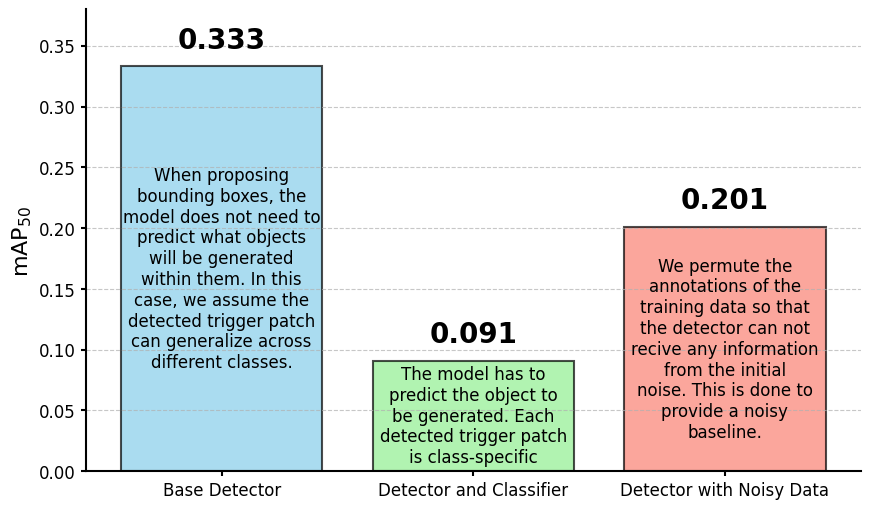

In [37]:
import matplotlib.pyplot as plt
import textwrap
# Data
values = [0.333, 0.091, 0.201]
labels = [
    "Base Detector",
    "Detector and Classifier",
    "Detector with Noisy Data"
]
short_labels = [
    "When proposing bounding boxes, the model does not need to predict what objects will be generated within them. In this case, we assume the detected trigger patch can generalize across different classes.",
    "The model has to predict the object to be generated. Each detected trigger patch is class-specific",
    "We permute the annotations of the training data so that the detector can not recive any information from the initial noise. This is done to provide a noisy baseline."
]
# Function to wrap text
# Function to dynamically wrap text based on string length without splitting words
def wrap_labels(labels, width):
    wrapped_labels = []
    for label in labels:
        wrapped_labels.append('\n'.join(textwrap.wrap(label, width=width, break_long_words=False)))
    return wrapped_labels

# Determine the wrapping width dynamically based on the label length
wrapped_labels = wrap_labels(short_labels, width=22)
short_labels = wrapped_labels
colors = ['skyblue', 'lightgreen', 'salmon']

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(labels, values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_ylabel('mAP$_{50}$',fontdict={'fontsize': 16})
ax.set_ylim(0, 0.38)  # Set the y-axis limit
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adding the data labels on top of the bars and text inside the bars
for bar, label in zip(bars, short_labels):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=20, fontweight='bold')
    ax.text(bar.get_x() + bar.get_width()/2, yval / 2, label, ha='center', va='center', fontsize=12, color='black', wrap=True)

# Additional styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.yaxis.set_tick_params(width=1.5)
ax.xaxis.set_tick_params(width=1.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the figure
file_path = "bar_chart.png"
plt.savefig(file_path, bbox_inches='tight', dpi=300)
plt.show()
